<a href="https://colab.research.google.com/github/Unoaccaso/lab_projects/blob/master/interferometro_michelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importazione dei dati
Si importa il dataset e si definiscono le funzioni che saranno successivamente utili all'analisi dati.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as cost

In [0]:
# funzione che calcola la visibilità su un vettore di intensità.
def V(I = None):
  I_max = I.max()
  I_min = I.min()
  V = (I_max - I_min)/(I_max + I_min)
  return V

# funzione per il plot della visibilità in tau.
def plot(y, x, fig_size = (10, 10), title=None, xlabel=None,
         ylabel=None):
  plt.figure(figsize = fig_size)
  plt.plot(x, y)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  plt.close()

# ====================
# Funzione per il fit 
# ====================
import scipy.odr as odr
from scipy.stats import kstest

''' Performs the fit
Needed Parameters (key-word):
  function: function with 2 arguments:
    array-like object for parameters (float-like)
    array-like object for variables (float-like)
  par0: array-like object for parameters prior (float-like)
  par_names: array-like object for parameters prior (string)
  file_name: csv with data
Returns:
  tuple with array of parameters and pvalue
'''
def fit(function=None, par0=None, par_names=None,
        x=None, y=None, sx=None, sy=None,
        xlabel="", ylabel="", title="", xres = 100):

  fit_data = odr.RealData(x, y=y, sx=sx, sy=sy)
  model = odr.Model(function)
  fit = odr.ODR(fit_data, 
                model, 
                beta0=par0)
  out = fit.run()

  par = out.beta
  par_s = out.sd_beta
  for i in range(len(par_names)):
    print(f'{par_names[i]} : {par[i]:.3f} +- {par_s[i]:.3f}')

  plt.errorbar(x, y, xerr=sx, yerr=sy,
    ecolor='black', fmt='o', color='black', markersize=2
  )
  d_x = max(x)-min(x)
  x = np.linspace(min(x)-d_x/10, max(x)+d_x/10, xres)
  d_y = max(y)-min(y)
  plt.ylim(min(y)-d_y/10, max(y)+d_y/10)
  plt.plot(x, function(par, x), color='blue')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()
  '''
  Kolmogorov-smirnov test on normalized residuals is performed.
  It tests the similarity between normalized residuals and a normalized gaussian.
  This similarity implies a reasonable belief in goodness of fit and
  correct estimation of uncertainties.
  If pvalue is > 0.05 the fit is accepted
  '''
  y_res_norm = out.eps/sy
  plt.hist(y_res_norm)
  plt.title("Residuals histogram")
  plt.show()
  pvalue = kstest(y_res_norm, 'norm').pvalue
  print(f"p_value: {pvalue}")

  return out

Si organizzano i dati in maniera più consona, utilizzando pandas, in modo da rendere più comoda la rappresentazione.

In [669]:
path = 'Dati_Michelson-v2.csv'
columns = [
           
]
# inserisco i dati in un dataset pandas.
try:
  data = pd.read_csv(path, header= 0, sep=';')
except:
  print("Errore nell'apertura del file dati")
#data = data.drop([2])
data['l'] = data['l']*2/29.98
data['dl'] = data['dl']*2/29.98
data = data.rename(columns = {'l':'tempo [ns]',
             'dl': 'sigma[t] [ns]',
             'V': 'Visibilità',
             'DV': 'sigma[V]'
})
data

,tempo [ns],sigma[t] [ns],Vmax (mV),DVmax (mV),Vmin (mV),DVmin (mV),Visibilità,sigma[V]
0,-0.340227,0.006671,77.2,3.3,9.0,1.3,0.791183,0.028171
1,-0.166778,0.006671,113.4,4.4,7.4,1.2,0.877483,0.019177
2,0.000007,0.006671,79.4,3.4,0.2,1.0,0.994975,0.025063
3,0.166778,0.006671,59.4,2.8,2.7,1.1,0.913043,0.034113
4,0.333556,0.006671,87.4,3.6,8.2,1.2,0.828452,0.023843
5,0.500334,0.006671,87.4,3.6,13.0,1.4,0.741036,0.025993
6,0.567045,0.006671,82.4,3.5,18.2,1.5,0.638171,0.027479
7,0.667111,0.006671,70.6,3.1,21.0,1.6,0.541485,0.031077
8,0.833889,0.006671,61.0,2.8,25.0,1.8,0.418605,0.035212
9,0.900600,0.006671,69.4,3.1,34.2,2.0,0.339768,0.032546


Per calcolare la visibilità si avrà bisogno di mettere a confronto il minimo ed il massimo dell'intensità, si crea quindi una funzione dedita a tale compito.

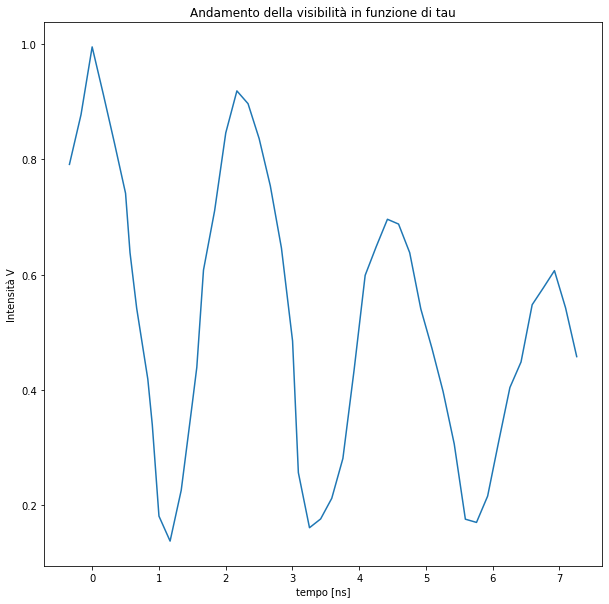

In [670]:
plot(data['Visibilità'], data['tempo [ns]'], title='Andamento della visibilità in funzione di tau',
     ylabel = 'Intensità V', xlabel = 'tempo [ns]')

Si definisce quindi una funzione che restituisca in output l'espressione di $|\gamma(\tau)|$ e si fittano i dati relativi alla visibilità in funzione del tempo tramite la suddetta funzione. <br/>
Si vuole mettere in evidenza come, data la complessità della funzione di fit, sia necessario fornire una prior per l'inferenza dei parametri del fit, onde evitare di giungere a convergenza in minimi locali.

sigma : 0.148 +- 0.010
N : 2.000 +- 0.001
Domega : 2.747 +- 0.011


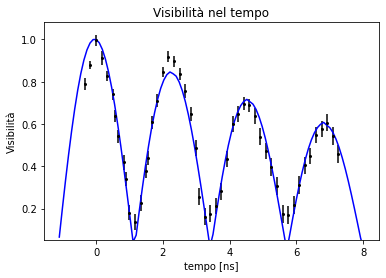

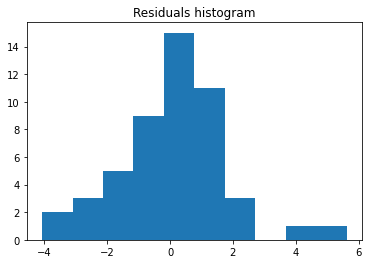

p_value: 0.2088605163790116


In [671]:
def rs(par, t):
    sigma = par[0]
    N = par[1]
    Domega = par[2]
    y = np.exp(-sigma*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fitted = fit(rs, x = data['tempo [ns]'], y = data['Visibilità'], 
             sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
             par0 = [0.16, 2, 2.7], par_names=['sigma', 'N', 'Domega'], 
             xres=100, title='Visibilità nel tempo', xlabel='tempo [ns]',
             ylabel = 'Visibilità')

Appreso grazie al p-value la bontà del fit, si procede con l'estrarre dai parametri ottenuti le grandezze di interesse. Si vuole in particolare conoscere la lunghezza della cavità, il tempo di coerenza e il tempo caratteristico (ovvero il tempo necessario affinché la visibilità si riduca di $\frac{1}{2e}$).

In [672]:
  best_par = fitted.beta
  best_par_s = fitted.sd_beta
  tau = 2/best_par[0]
  stau = best_par_s[0]/(best_par[0]*best_par[0])
  print(f'tau value: ({tau : .1f}+-{stau: .1f})ns')

tau value: ( 13.5+- 0.4)ns


0.3518095392590547


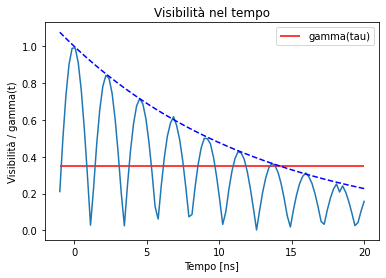

In [673]:
x = np.linspace(-1, 20, 100)
plt.plot(x, rs(best_par, x))
plt.hlines(rs(best_par, tau), -1, 20,  label = 'gamma(tau)', color='red')
plt.plot(x, np.exp(-best_par[0]*x/2), '--', color='blue')
plt.title('Visibilità nel tempo')
plt.xlabel('Tempo [ns]')
plt.ylabel('Visibilità / gamma(t)')
plt.legend()
print(rs(best_par, tau))

In [674]:
# lunghezza della cavità
L = cost.pi*cost.c/(par[2]*1e9)
sL = cost.pi*cost.c*par_s[2]*1e9/(par[2]*1e9)**2
print(f'Lunghezza della cavità del laser: ({L:.3f} +- {sL:.3f})m')

Lunghezza della cavità del laser: (0.343 +- 0.001)m


Si prova dunque a fornire come prior un valore indicativo dei modi pari a 3 e al fine di cercare di comprendere se esso possa rappresentare una stima coerente.

sigma : 0.080 +- 0.031
N : 2.998 +- 0.004
Domega : 2.750 +- 0.019


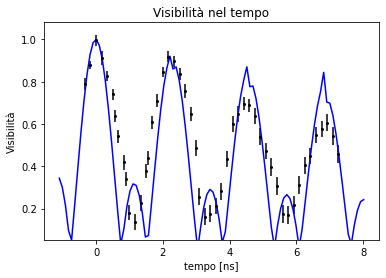

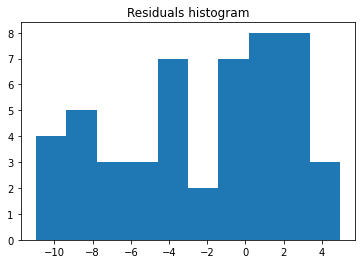

p_value: 4.1567713092917166e-10


In [675]:
#verifica dell'ipotesi dei 3 modi
def rs(par, t):
    sigma = par[0]
    N = par[1]
    Domega = par[2]
    y = np.exp(-sigma*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fit(rs, x = data['tempo [ns]'], y = data['Visibilità'],
    sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
    par0 = [0.16, 3, 2.76], par_names=['sigma', 'N', 'Domega'],
    title='Visibilità nel tempo', xlabel='tempo [ns]',
    ylabel = 'Visibilità')

# Test della differenza delle intensità

alpha : 0.978 +- 0.012


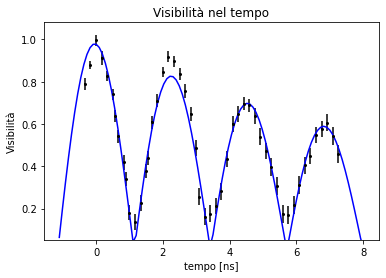

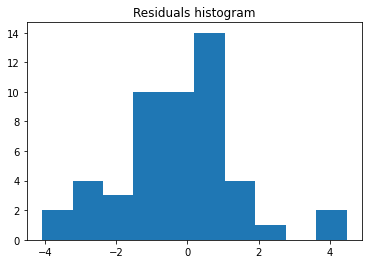

p_value: 0.0791186288397785


In [676]:
def rs(par, t):
    alpha = par[0]
    sigma = 0.1481
    N=2
    Domega = 2.747
    y = alpha*np.exp(-sigma*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fitted = fit(rs, x = data['tempo [ns]'], y = data['Visibilità'], 
             sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
             par0 = [1], par_names=['alpha'], 
             xres=100, title='Visibilità nel tempo', xlabel='tempo [ns]',
             ylabel = 'Visibilità')

l0 : 90.924 +- 134.192
l : 12.125 +- 90.958


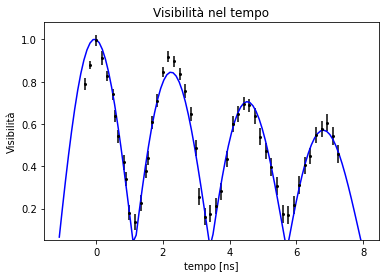

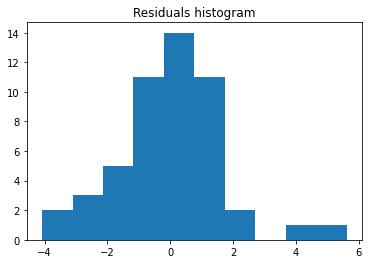

p_value: 0.18138292061027772


In [677]:
def rs(par, t):
    N = 2
    Domega = 2.747
    dl = t*29.98/2
    l0 = par[0]
    l = par[1]
    # l ---> dist percorsa da entrambi
    # dl ---> scarto del secondo
    # l0 ---> lunghezza caratteristica
    def I(dl, l0, l):
      return 1/(1+((l-dl)/l0)**2)
    def alpha(dl, l0, l):
      return 2*np.sqrt(I(0, l0, l)*I(dl, l0, l))/(I(0, l0, l)+I(dl, l0, l))
    y = alpha(dl, l0, l)*np.exp(-0.1481*t/2)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fitted = fit(rs, x = data['tempo [ns]'], y = data['Visibilità'], 
             sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
             par0 = [100, 10], par_names=['l0', 'l'], xres=100,
             title='Visibilità nel tempo', xlabel='tempo [ns]',
             ylabel = 'Visibilità')

Abbiamo visto che non appena si inserisce un parametro di controllo per stimare la differenza tra le intensità d'ingresso il fit SMINCHIA, al livello che ci tocca fissa il valore di sigma, sennò se ne parte. buon lavoro lele

#Gaussiana

sigma : 0.239 +- 0.009
N : 2.000 +- 0.001
Domega : 2.746 +- 0.011


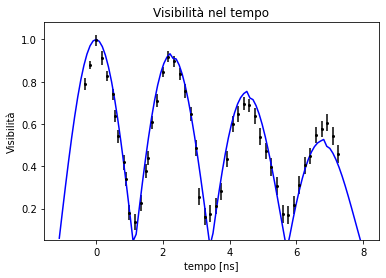

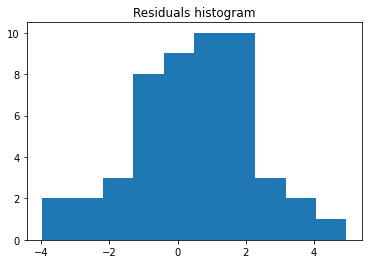

p_value: 0.0006616885369961545
Valore ricavato di tau: (8.4+-0.3)ns


In [681]:
def rs(par, t):
    sigma = par[0]
    N = par[1]
    Domega = par[2]
    y = np.exp(-sigma*sigma*t*t/4)/N*np.abs(np.sin(N*Domega*t/2)/np.sin(Domega*t/2))
    return y
fitted = fit(rs, x = data['tempo [ns]'], y = data['Visibilità'], 
             sy = data['sigma[V]'], sx = data['sigma[t] [ns]'],
             par0 = [0.16, 2, 2.7], par_names=['sigma', 'N', 'Domega'], 
             xres=100, title='Visibilità nel tempo', xlabel='tempo [ns]',
             ylabel = 'Visibilità')
par = fitted.beta
par_s = fitted.sd_beta
tau = 2/par[0]
stau = par_s[0]/(par[0]*best_par[0])
print(f'Valore ricavato di tau: ({tau:.1f}+-{stau:.1f})ns')

come vedi lele, fa cagare